## 回归问题

导入boston房价数据集

In [1]:
import numpy as np
from sklearn.datasets import load_boston
boston=load_boston()
boston.keys()

print(boston.DESCR)
boston.feature_names
boston.target

import pandas as pd   
df = pd.DataFrame(boston.data)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston.target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

将数据分成训练集和测试集

In [4]:
from sklearn.model_selection import train_test_split
X = boston.data[:,5].reshape(-1,1)
y = boston.target
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2,random_state = 33)

### 一维线性回归

用RM(average number of rooms per dwelling)这个一维数据建立线性回归模型

并在测试集上测试，输出结果

In [5]:
from sklearn.linear_model import LinearRegression  
lineR = LinearRegression()
lineR.fit(train_X,train_y) 

lineR.score(test_X,test_y)

0.43684909768075864

画图

In [6]:
from sklearn.linear_model import LinearRegression  
lineR = LinearRegression()
lineR.fit(train_X.reshape(-1,1),train_y) 
k = lineR.coef_     #斜率
b = lineR.intercept_        #截距

import matplotlib.pyplot as plt
x=boston.data[:,5].reshape(-1,1)
y=boston.target
plt.figure(figsize=(10,6))  #指定显示图大小
plt.scatter(x,y)

from sklearn.linear_model import LinearRegression
lineR=LinearRegression()
lineR.fit(x,y)
y_pred=lineR.predict(x)
plt.plot(x,y_pred,'black')    #散点图
print(lineR.coef_,lineR.intercept_)
plt.show()

[9.10210898] -34.67062077643857


<Figure size 1000x600 with 1 Axes>

### 多维线性回归

用所有的特征一起建立线性回归模型

In [7]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(boston.data,boston.target,test_size = 0.2,random_state = 33)

输出结果

In [8]:
from sklearn.linear_model import LinearRegression  
lineR = LinearRegression()
lineR.fit(train_X,train_y) 

lineR.score(test_X,test_y)

0.6922908805512095

## 多项式回归模型

一元多项式回归模型，建立一个变量(average number of rooms per dwelling)与房价之间的预测模型，并图形化显示

如果有一个特征，进行多项式处理之后会变成3个，例如a变成了[1,a,a*a]

In [9]:
from  sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit_transform([[3]])

array([[1., 3., 9.]])

如果有两个特征，进行多项式处理之后会变成3个，例如a,b变成了[1,a,b,$a^2$,ab,$b^2$]

In [10]:
from  sklearn.preprocessing import PolynomialFeatures
poly.fit_transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

如果有n个特征，进行多项式处理之后会变成1+n+n+n(n-1)/2个

In [11]:
from sklearn.model_selection import train_test_split
X = boston.data[:,5].reshape(-1,1)
y = boston.target
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2,random_state = 33)

In [12]:
from  sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
train_X_poly = poly.fit_transform(train_X)

lrp = LinearRegression()
lrp.fit(train_X_poly,train_y)

test_X_poly = poly.fit_transform(test_X)
lrp.score(test_X_poly,test_y)

0.42086137062025974

反而没有之前高了，说明出现了过拟合

![KkZLyn.jpg](https://s2.ax1x.com/2019/10/16/KkZLyn.jpg)

画出图像

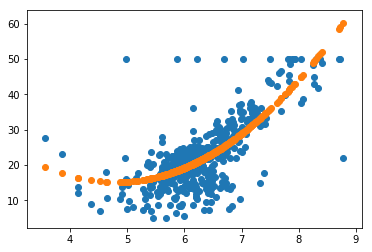

In [13]:
from  sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
train_X_poly = poly.fit_transform(train_X)

lrp = LinearRegression()
lrp.fit(train_X_poly,train_y)
y_poly_pred = lrp.predict(poly.fit_transform(X))

plt.scatter(X,y)
plt.scatter(X,y_poly_pred)   #一元多项式回归
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(boston.data,boston.target,test_size = 0.2,random_state = 33)

In [15]:
from  sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
train_X_poly = poly.fit_transform(train_X)

lrp = LinearRegression()
lrp.fit(train_X_poly,train_y)

test_X_poly = poly.fit_transform(test_X)
lrp.score(test_X_poly,test_y)

0.8616456686205886

当degree = 1时，就是linear regression

In [16]:
from  sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
train_X_poly = poly.fit_transform(train_X)

lrp = LinearRegression()
lrp.fit(train_X_poly,train_y)

test_X_poly = poly.fit_transform(test_X)
lrp.score(test_X_poly,test_y)

0.6922908805512087

## 正则化技术

### 岭回归Redge Regression

$$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$$

In [17]:
from sklearn.linear_model import Ridge

rr=Ridge(alpha = 1)

rr.fit(train_X,train_y)
rr.score(test_X,test_y)

0.6833396417695794

### 多项式回归模型+岭回归Redge Regression

如果有n个特征，进行多项式处理之后会变成1+n+n+n(n-1)/2个

我们的目标是让1+n之后的特征参数尽可能小，这样可以避免过拟合

In [18]:
train_X_poly = poly.fit_transform(train_X)

In [19]:
from  sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_X_poly = poly.fit_transform(train_X)

rr=Ridge()
rr.fit(train_X_poly,train_y)

test_X_poly = poly.fit_transform(test_X)
rr.score(test_X_poly,test_y)

0.8397513708729679

### 最小绝对收缩选择算子Lasso

$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

In [20]:
from sklearn.linear_model import Lasso

l=Lasso(alpha = 1)

l.fit(train_X,train_y)
l.score(test_X,test_y)

0.6592074324274

### 多项式回归模型+Lasso

如果有n个特征，进行多项式处理之后会变成1+n+n+n(n-1)/2个

我们的目标是让1+n之后的特征参数尽可能小，这样可以避免过拟合

In [21]:
train_X_poly = poly.fit_transform(train_X)

In [22]:
from  sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_X_poly = poly.fit_transform(train_X)

l=Lasso(alpha = 1)
l.fit(train_X_poly,train_y)

test_X_poly = poly.fit_transform(test_X)
l.score(test_X_poly,test_y)

C:\Users\TianTT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2236.5917203472245, tolerance: 3.5224875123762383
  positive)


0.7919831277010826

### RandomForest*

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_X,train_y)
rf.score(test_X,test_y)

C:\Users\TianTT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8093420435223835

In [24]:
from  sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_X_poly = poly.fit_transform(train_X)

rf = RandomForestRegressor()
rf.fit(train_X_poly,train_y)

test_X_poly = poly.fit_transform(test_X)
rf.score(test_X_poly,test_y)

C:\Users\TianTT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8213076382684794